In [1]:
import ImageTest as imtest
import numpy as np
from projectConstants import *
import toolbox
import os
from deap import tools

In [2]:
if not os.path.exists(path_results):
    os.makedirs(path_results)

In [3]:
population = np.array([toolbox.Chromosome() for i in range(POPULATION_SIZE)])
print("ready to go")

ready to go


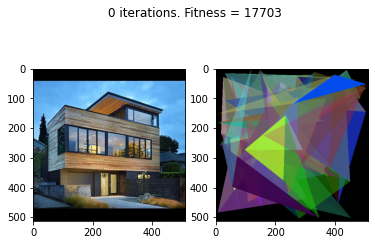

0
100
200
300
400
500
600
700
800
900
1000


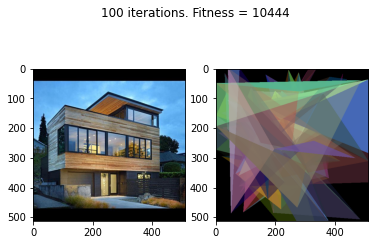

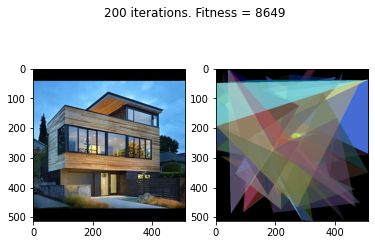

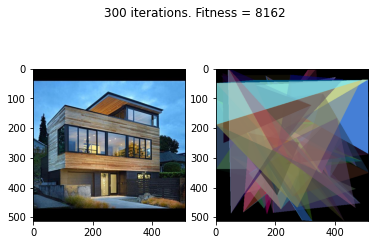

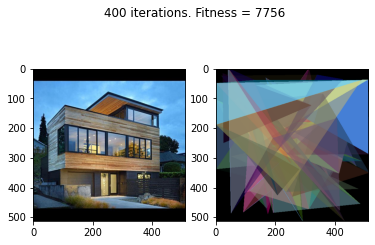

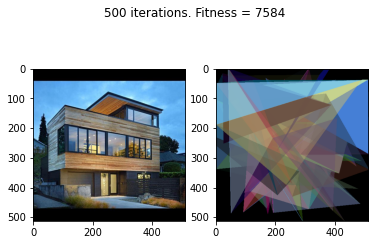

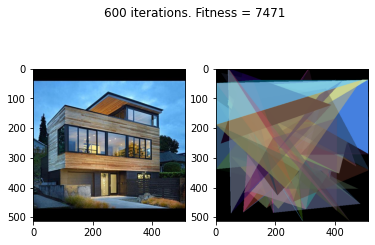

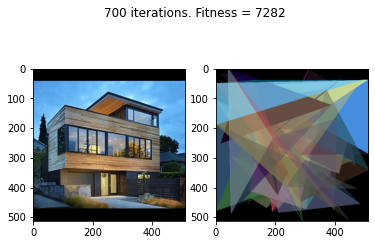

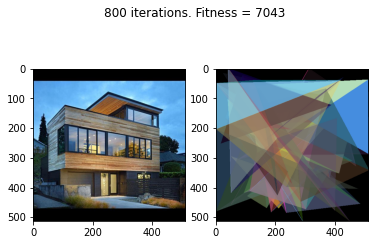

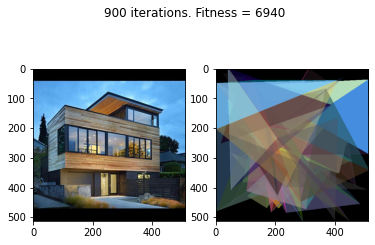

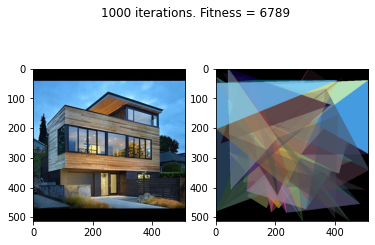

In [ ]:
for i in range(EPOCHS):
    # keep hall of fame unchanged
    hof = toolbox.hall_of_fame(population)
    # select individuals
    offspring = toolbox.select(population, len(population) - HOF_NUMBER)
    # perform crossover
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if np.random.random() < P_CROSSOVER:
            #tools.cxSimulatedBinaryBounded(child1.data, child2.data, SBX_ETA, 0, 1)
            toolbox.crossover(child1, child2)
            # set fitness to invalid state
            child1.fitness_value = -1
            child2.fitness_value = -1
    # mutations
    for mutant in offspring:
        if np.random.random() < P_MUTATION:
            toolbox.mutate(mutant)
            # tools.mutPolynomialBounded(mutant.data, SBX_ETA, 0, 1, 1 / (mutant.data.shape[0]))
            mutant.fitness_value = -1
    # recalculate fitness if needed
    for entity in offspring:
        if entity.fitness_value == -1:
            entity.fitness()
    # update population
    population = np.concatenate((hof, offspring))
    if i % 100 == 0:
        imtest.save_best_individual(population, i)
        imtest.save_population(population)
        print(i)
print('done.')

In [ ]:
origImage = cv2.imread('./results/rabbitlongrun/iteration4900.png')
blurredImage = cv2.GaussianBlur(origImage, (45, 45), cv2.BORDER_DEFAULT)
type(blurredImage)
cv2.imwrite('color_img.jpg', blurredImage)
cv2.imshow("image", blurredImage)
cv2.waitKey()

In [ ]:
imtest.saveImage(imtest.dataToImage(min(population, key=lambda x: x.fitness_value).data))